In [1]:
import os
os.chdir(r'C:\Users\DELL\Personal Project\Supervised_Learning\Regression')

In [2]:
from LinearRegression import LinearRegression
from RidgeRegression import RidgeRegression
from LassoRegression import LassoRegression

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Import dataset

In [4]:
data = fetch_california_housing()
print(data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [5]:
df = pd.DataFrame(data.data, columns = data.feature_names)
df[data.target_names[0]] = data.target
pd.set_option('display.max_columns', None)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


# EDA

In [6]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


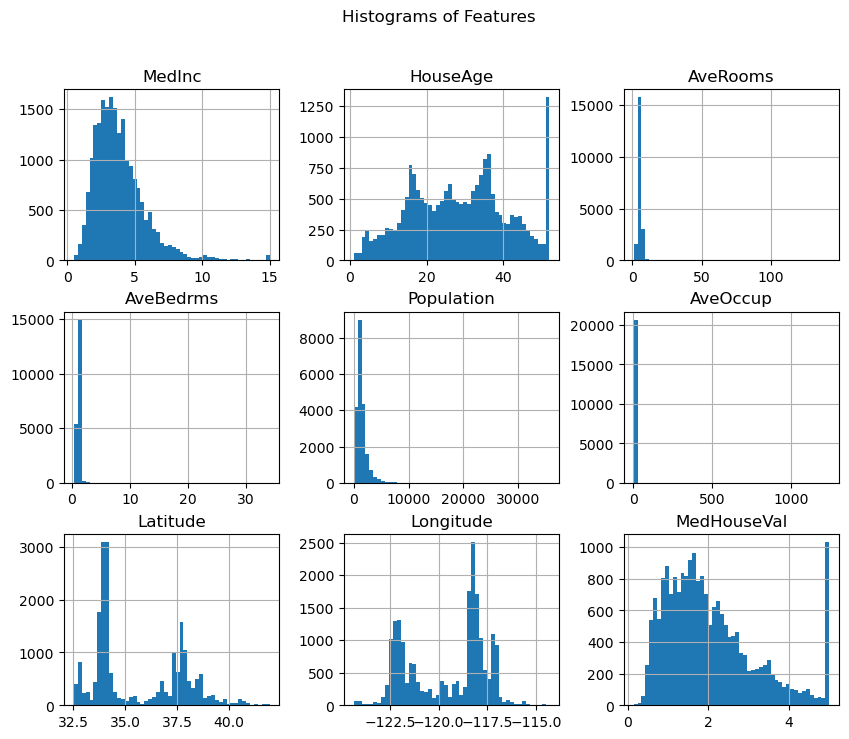

In [7]:
# Distribution
df.hist(figsize=(10, 8), bins=50)
plt.suptitle('Histograms of Features')
plt.show()

> There are outliers in some features

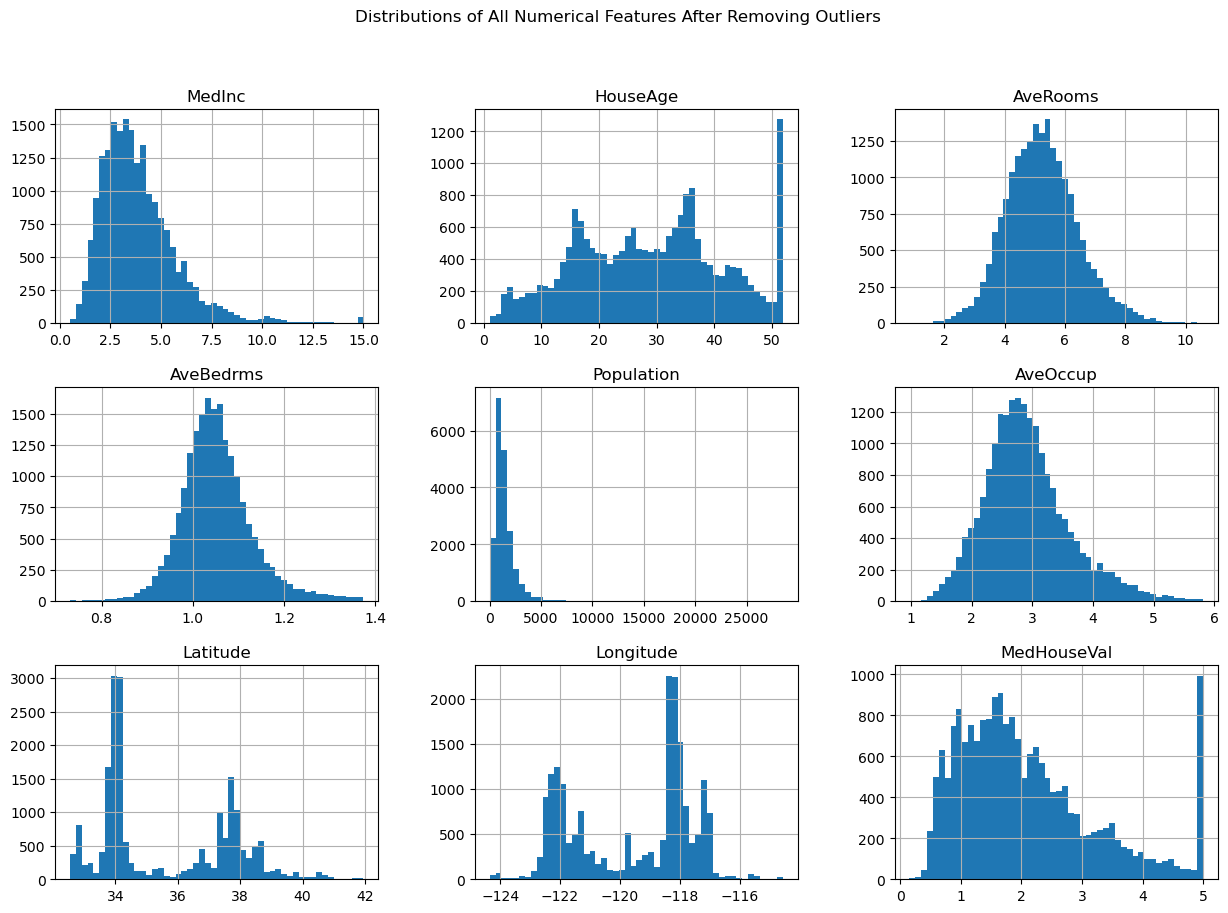

In [8]:
# Remove outliers
def remove_outliers_iqr(df, column):
    # Calculate Q1 and Q3
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 3 * IQR
    upper_bound = Q3 + 3 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

cleaned_df = df.copy()
for column in ['AveRooms', 'AveBedrms', 'AveOccup']:
    cleaned_df = remove_outliers_iqr(cleaned_df, column)


# Visualize the left data 
cleaned_df.hist(figsize=(15, 10), bins=50)
plt.suptitle('Distributions of All Numerical Features After Removing Outliers')
plt.show()

# Building Model

## Simple model

Mean Squared Error: 0.4347264690669366


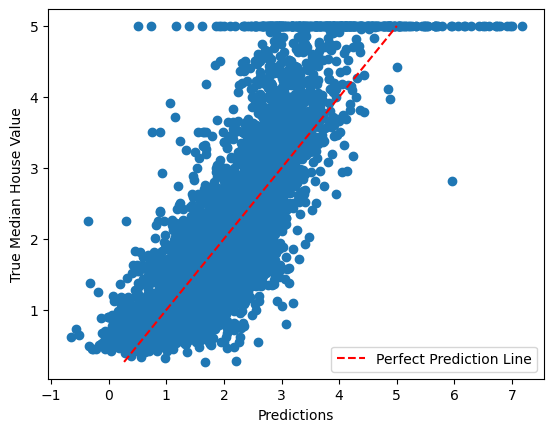

In [9]:
# Linear Regression
X, y = cleaned_df.drop(columns = ['MedHouseVal']), cleaned_df['MedHouseVal']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

plt.scatter(y_pred, y_test)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction Line')
plt.xlabel('Predictions')
plt.ylabel('True Median House Value')
plt.legend()
plt.show()

## Log-transform features of skew distribution

Skewness of Continuous Features:
 MedInc         1.625031
HouseAge       0.035115
AveRooms       0.324464
AveBedrms      0.635826
Population     3.932112
AveOccup       0.742176
Latitude       0.466984
Longitude     -0.313931
MedHouseVal    0.960520
dtype: float64


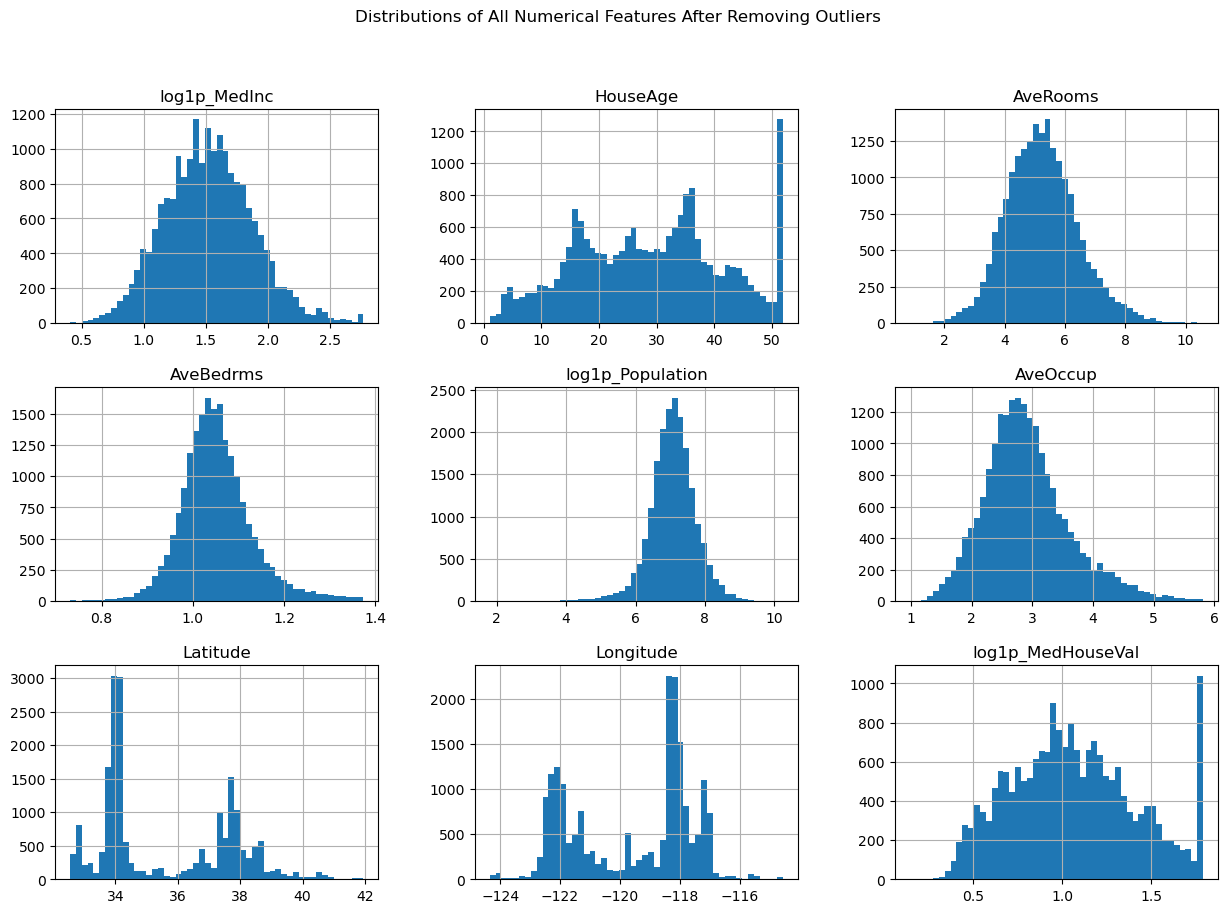

In [10]:
# Check skewness
skewness = cleaned_df.iloc[:, :].skew()
print("Skewness of Continuous Features:\n", skewness)
# Transform to handle skewness
cleaned_df_tf = cleaned_df.copy()
skew = skewness[abs(skewness) > 0.8].index
cleaned_df_tf[skew] = cleaned_df_tf[skew].apply(lambda x: np.log1p(x)) 
cleaned_df_tf.rename(columns = {feature: "log1p_" + feature for feature in skew}, inplace = True)
cleaned_df_tf.hist(figsize=(15, 10), bins=50)
plt.suptitle('Distributions of All Numerical Features After Removing Outliers')
plt.show()

In [11]:
X, y = cleaned_df_tf.drop(columns = ['log1p_MedHouseVal']),cleaned_df_tf['log1p_MedHouseVal']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Mean Squared Error: 0.4278084040294508


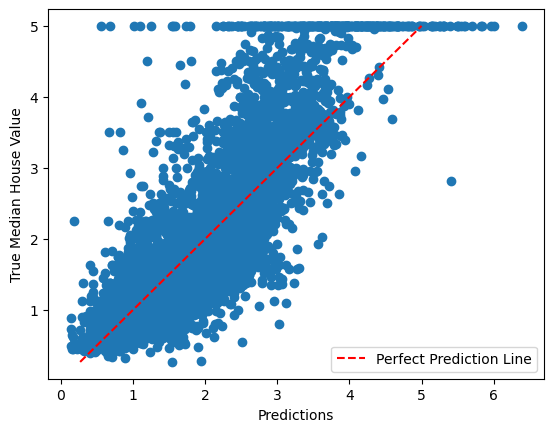

In [12]:
# Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_test, y_pred = np.expm1(y_test), np.expm1(y_pred)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

plt.scatter(y_pred, y_test)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction Line')
plt.xlabel('Predictions')
plt.ylabel('True Median House Value')
plt.legend()
plt.show()

> MSE is improved a little

## Try polynomial features and tuning Ridge Regression

In [13]:
X, y = cleaned_df_tf.drop(columns = ['log1p_MedHouseVal']),cleaned_df_tf['log1p_MedHouseVal']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [14]:
ridge_param_grid = {
    'ridge__alpha': np.geomspace(1e-4, 1e-2, num = 3)
}
ridge_pl = Pipeline([
    ('poly', PolynomialFeatures(degree=4)),
    ('scaler', StandardScaler()),
    ('ridge', RidgeRegression(lrate=0.01, tol=1e-4))
])
ridge_gs = GridSearchCV(ridge_pl, ridge_param_grid, cv=3, scoring='neg_root_mean_squared_error', verbose=1, n_jobs=-1) 
ridge_gs.fit(X_train, y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
Not converged yet at epoch 10000
Till epoch 9999 best loss 0.031037940615217613 at epoch 9999


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('poly', PolynomialFeatures(degree=4)),
                                       ('scaler', StandardScaler()),
                                       ('ridge',
                                        <RidgeRegression.RidgeRegression object at 0x000001FD9BF18AA0>)]),
             n_jobs=-1,
             param_grid={'ridge__alpha': array([0.0001, 0.001 , 0.01  ])},
             scoring='neg_root_mean_squared_error', verbose=1)

{'ridge__alpha': 0.0001}
Mean Squared Error: 0.3515528075641024


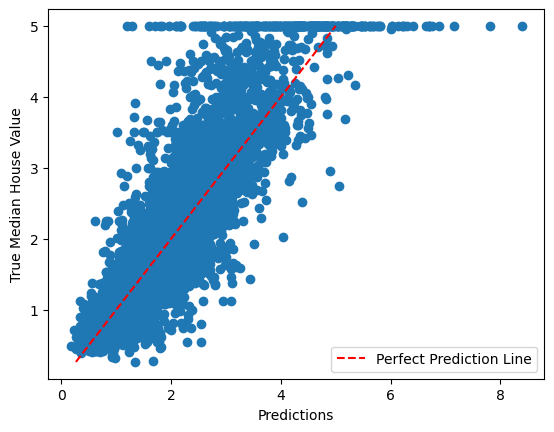

In [15]:
print(ridge_gs.best_params_)
y_pred = ridge_gs.best_estimator_.predict(X_test)
y_test, y_pred = np.expm1(y_test), np.expm1(y_pred)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

plt.scatter(y_pred, y_test)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction Line')
plt.xlabel('Predictions')
plt.ylabel('True Median House Value')
plt.legend()
plt.show()

## Try polynomial features and tuning Lasso Regression

In [16]:
X, y = cleaned_df_tf.drop(columns = ['log1p_MedHouseVal']),cleaned_df_tf['log1p_MedHouseVal']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [17]:
lasso_param_grid = {
    'lasso__alpha': np.geomspace(1e-3, 1e-1, num = 3)
}
lasso_pl = Pipeline([
    ('poly', PolynomialFeatures(degree=4)),
    ('scaler', StandardScaler()),
    ('lasso', LassoRegression(lrate=0.01, tol=1e-4))
])
lasso_gs = GridSearchCV(lasso_pl, lasso_param_grid, cv=3, scoring='neg_root_mean_squared_error', verbose=1, n_jobs=-1) 
lasso_gs.fit(X_train, y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
Not converged yet at epoch 10000
Till epoch 9999 best loss 0.0310386318977578 at epoch 9999


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('poly', PolynomialFeatures(degree=4)),
                                       ('scaler', StandardScaler()),
                                       ('lasso',
                                        <LassoRegression.LassoRegression object at 0x000001FD9DF1C9E0>)]),
             n_jobs=-1,
             param_grid={'lasso__alpha': array([0.001, 0.01 , 0.1  ])},
             scoring='neg_root_mean_squared_error', verbose=1)

{'lasso__alpha': 0.001}
Mean Squared Error: 0.35155588861402204


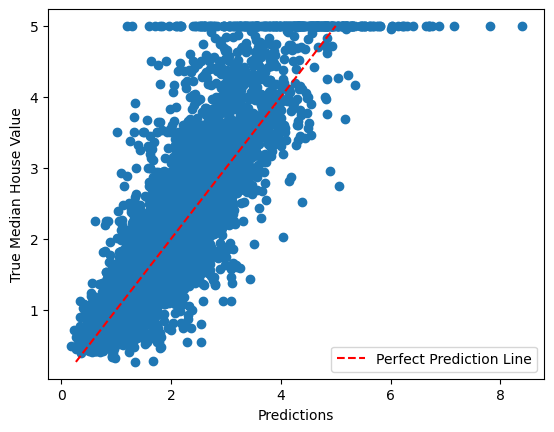

In [18]:
print(lasso_gs.best_params_)
y_pred = lasso_gs.best_estimator_.predict(X_test)
y_test, y_pred = np.expm1(y_test), np.expm1(y_pred)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

plt.scatter(y_pred, y_test)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction Line')
plt.xlabel('Predictions')
plt.ylabel('True Median House Value')
plt.legend()
plt.show()

## Compare to model of sklearn

In [19]:
X, y = cleaned_df_tf.drop(columns = ['log1p_MedHouseVal']),cleaned_df_tf['log1p_MedHouseVal']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [20]:
from sklearn.linear_model import Ridge
ridge_params_grid = {
    'ridge__alpha': np.geomspace(1e-4, 1e-2, num = 3)
}
# Create the pipeline
pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=4)),   # Polynomial Features (degree 2 as an example)
    ('scaler', StandardScaler()),             # StandardScaler to scale the data
    ('ridge', Ridge(alpha=1.0))               # Ridge regression model with alpha=1.0
])
pipeline_gs = GridSearchCV(pipeline, ridge_params_grid, cv=3, scoring='neg_root_mean_squared_error', verbose=1, n_jobs=-1) 
pipeline_gs.fit(X_train, y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('poly', PolynomialFeatures(degree=4)),
                                       ('scaler', StandardScaler()),
                                       ('ridge', Ridge())]),
             n_jobs=-1,
             param_grid={'ridge__alpha': array([0.0001, 0.001 , 0.01  ])},
             scoring='neg_root_mean_squared_error', verbose=1)

{'ridge__alpha': 0.01}
Best score (negative MSE): -0.17479778199376816
Mean Squared Error: 0.32403703966558145


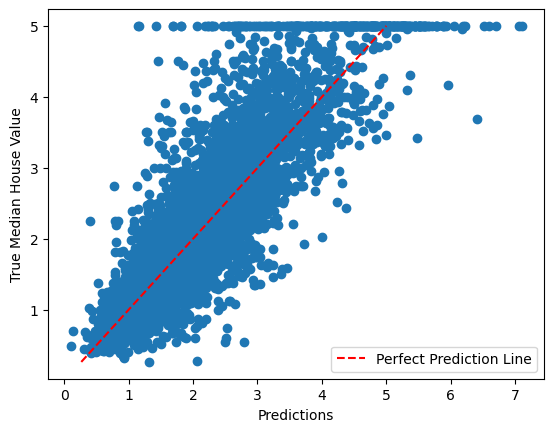

In [21]:
print(pipeline_gs.best_params_)
print(f"Best score (negative MSE): {pipeline_gs.best_score_}")
y_pred = pipeline_gs.best_estimator_.predict(X_test)
y_test, y_pred = np.expm1(y_test), np.expm1(y_pred)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

plt.scatter(y_pred, y_test)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction Line')
plt.xlabel('Predictions')
plt.ylabel('True Median House Value')
plt.legend()
plt.show()

> Unlike the self-made model, the optimal alpha of the regulation term of the model from sklearn is the largest one. The performance is also slightly better.

# Summary
The algorithm is not implemented optimally so it takes a long time to run and still does not converge. 

MSE is clearly improved by using polynomial features with appropriate regularization. Scaling features is important for the weights to be equally regularized.

Additional hyperparameter tuning can be executed to reach convergence confirmation but will take additional time.